In [208]:
#import the warnings.
import warnings
warnings.filterwarnings("ignore")

In [209]:
#import the useful libraries.
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Cleaning 

In [593]:
inp0 = pd.read_csv("Leads.csv", sep=",", header=0)
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [594]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [595]:
# Number of features in detaset
numeric_columns = inp0.select_dtypes(include=np.number).columns.tolist()
print('numerical features: {}'.format(str(len(numeric_columns))))
categorical_columns = inp0.select_dtypes(include=object).columns.tolist()
print('Categorical features: {}'.format(str(len(categorical_columns))))

numerical features: 7
Categorical features: 30


### Missing values analysis

In [596]:
# Cheching missing values
def check_null(inp0):
    missingValues= inp0.isnull().sum()
    missingValues_percentage = inp0.isnull().sum() / len(inp0) * 100
    missing_values_df = pd.concat([missingValues,missingValues_percentage], axis=1)
    missing_values_df.rename(columns = {0: 'NA Count', 1: 'Missing Percentage'}, inplace = True)
    missing_values_df.sort_values(by=['Missing Percentage'], ascending=False,inplace=True)
    return missing_values_df[missing_values_df['Missing Percentage']>0]

In [597]:
null_df = check_null(inp0)
null_df.head(20)

,NA Count,Missing Percentage
Lead Quality,4767,51.590909
Asymmetrique Activity Index,4218,45.649351
Asymmetrique Profile Score,4218,45.649351
Asymmetrique Activity Score,4218,45.649351
Asymmetrique Profile Index,4218,45.649351
Tags,3353,36.287879
Lead Profile,2709,29.318182
What matters most to you in choosing a course,2709,29.318182
What is your current occupation,2690,29.112554
Country,2461,26.634199


In [598]:
# Dropping columns having 30% null values
inp0 = inp0.drop(['Lead Quality',
                  'Asymmetrique Activity Score', 
                  'Asymmetrique Profile Score', 
                  'Asymmetrique Activity Index', 
                  'Asymmetrique Profile Index',
                  'Tags',
                  'Lead Profile'], axis=1)

In [599]:
inp0.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [600]:
# Checking Lead Origin
inp0['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [862]:
# Checking Lead Source
inp0['Lead Source'].value_counts()

Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
Click2call              4
Social Media            2
Press_Release           2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
blog                    1
NC_EDM                  1
testone                 1
welearnblog_Home        1
youtubechannel          1
Name: Lead Source, dtype: int64

In [602]:
# Google is appearning twice with different case. Let's convert into Google

inp0['Lead Source'] = inp0['Lead Source'].replace('google', 'Google')

In [603]:
# Replacing missing values with highest frequency Lead Source i.e. Google
inp0['Lead Source'] = inp0['Lead Source'].replace(np.nan, 'Google')

In [604]:
# replacing TotalVisits missing value with medinan value
inp0.TotalVisits.median()

3.0

In [605]:
# Replacing missing values median
inp0.TotalVisits= inp0.TotalVisits.replace(np.nan, inp0.TotalVisits.median())

In [606]:
#Last Activity value counts
inp0['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Marked Spam                  2
Email Received                     2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [607]:
# Replacing missing values with Unknown
inp0['Last Activity'] = inp0['Last Activity'].replace(np.nan, 'Unknown')


In [608]:
# replacing Page Views Per Visit missing values with Page Views Per Visit
inp0['Page Views Per Visit'] = inp0['Page Views Per Visit'].replace(np.nan, inp0['Page Views Per Visit'].median())


In [609]:
# value counts ffor What is your current Occupation

inp0['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [610]:
inp0['What is your current occupation'] = inp0['What is your current occupation'].replace(np.nan, 'Unknown')

In [611]:
#Checking null values again
check_null(inp0)

,NA Count,Missing Percentage
What matters most to you in choosing a course,2709,29.318182
Country,2461,26.634199
How did you hear about X Education,2207,23.885281
Specialization,1438,15.562771
City,1420,15.367965


In [612]:
# value counts for "What matters most to you in choosing a course"

inp0['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [613]:
#What matters most to you in choosing a course" is biased against 
# Better Career Prospects, hence we will drop the column
inp0.drop(['What matters most to you in choosing a course'], inplace=True,axis=1)

In [614]:
# value counts for Country
inp0.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
Germany                    4
Nigeria                    4
South Africa               4
Canada                     4
Sweden                     3
Bangladesh                 2
China                      2
Ghana                      2
Netherlands                2
Uganda                     2
Asia/Pacific Region        2
Belgium                    2
Italy                      2
Philippines                2
Malaysia                   1
Tanzania                   1
Sri Lanka                  1
Indonesia                  1
Russia                     1
Kenya                      1
Vietnam       

In [615]:
#Country is having 26.63% missing and the feature is dominated by India, hence we shall drop this column.
inp0.drop(['Country'], inplace=True,axis=1)

In [616]:
#Checking null values again
check_null(inp0)

,NA Count,Missing Percentage
How did you hear about X Education,2207,23.885281
Specialization,1438,15.562771
City,1420,15.367965


In [617]:
# replacing misit missing values with "Not discolssed"
inp0['How did you hear about X Education'] = inp0['How did you hear about X Education'].replace(np.nan, 'Not Disclosed')
inp0['Specialization'] = inp0['Specialization'].replace(np.nan, 'Not Disclosed')

In [619]:
print("Search: value counts")
print(inp0['Search'].value_counts())
print("")

print("Through Recommendations: value counts")
print(inp0['Through Recommendations'].value_counts())
print("")

print("Digital Advertisement: value counts")
print(inp0['Digital Advertisement'].value_counts())
print("")

print("Newspaper: value counts")
print(inp0['Newspaper'].value_counts())
print("")

print("X Education Forums: value counts")
print(inp0['X Education Forums'].value_counts())
print("")

print("Newspaper Article: value counts")
print(inp0['Newspaper Article'].value_counts())
print("")

print("Magazine: value counts")
print(inp0.Magazine.value_counts())
print("")

print("Receive More Updates About Our Courses: value counts")
inp0["Receive More Updates About Our Courses"].value_counts()
print("")

print("Update me on Supply Chain Content: value counts")
print(inp0["Update me on Supply Chain Content"].value_counts())
print("")

print("Get updates on DM Content: value counts")
print(inp0["Get updates on DM Content"].value_counts())
print("")

print("I agree to pay the amount through cheque: value counts")
print(inp0["I agree to pay the amount through cheque"].value_counts())

Search: value counts
No     9226
Yes      14
Name: Search, dtype: int64

Through Recommendations: value counts
No     9233
Yes       7
Name: Through Recommendations, dtype: int64

Digital Advertisement: value counts
No     9236
Yes       4
Name: Digital Advertisement, dtype: int64

Newspaper: value counts
No     9239
Yes       1
Name: Newspaper, dtype: int64

X Education Forums: value counts
No     9239
Yes       1
Name: X Education Forums, dtype: int64

Newspaper Article: value counts
No     9238
Yes       2
Name: Newspaper Article, dtype: int64

Magazine: value counts
No    9240
Name: Magazine, dtype: int64

Receive More Updates About Our Courses: value counts

Update me on Supply Chain Content: value counts
No    9240
Name: Update me on Supply Chain Content, dtype: int64

Get updates on DM Content: value counts
No    9240
Name: Get updates on DM Content, dtype: int64

I agree to pay the amount through cheque: value counts
No    9240
Name: I agree to pay the amount through cheque, dt

In [620]:
# Dropping columns having only "No" selected
inp0.drop(['Newspaper Article','Magazine', 'I agree to pay the amount through cheque',
               'Update me on Supply Chain Content', 
               'Receive More Updates About Our Courses', 
               'Get updates on DM Content', 'City', 'Newspaper', 
               'X Education Forums', 'Digital Advertisement',
               'Through Recommendations', 'Search'],inplace=True, axis=1)

In [622]:
#Checking null values again
check_null(inp0)

,NA Count,Missing Percentage


### Handling Outliers

In [623]:
inp0.shape

(9240, 16)

In [624]:
inp0.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,How did you hear about X Education,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Select,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Select,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Select,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Word Of Mouth,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,Select,Other,Unemployed,No,Modified


In [864]:
cols=['TotalVisits',"Total Time Spent on Website","Page Views Per Visit"]
inp0[cols].describe(percentiles=[.25,.5,.75,.90,.95,.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
95%,10.000000,1562.000000,6.000000
99%,17.000000,1840.610000,9.000000


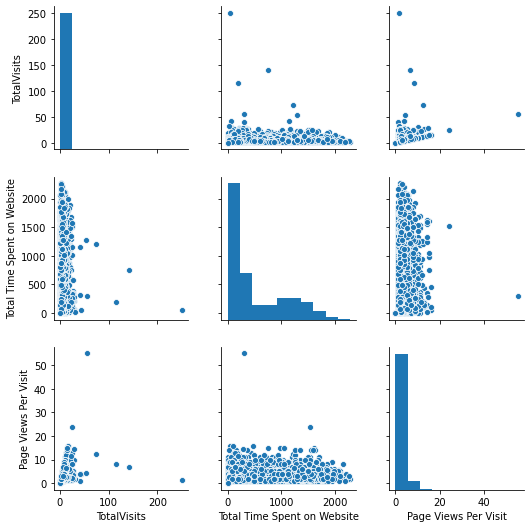

In [626]:
#outliers are present for numeric variables
cols=['TotalVisits',"Total Time Spent on Website","Page Views Per Visit"]
sns.pairplot(inp0[cols])
plt.show()

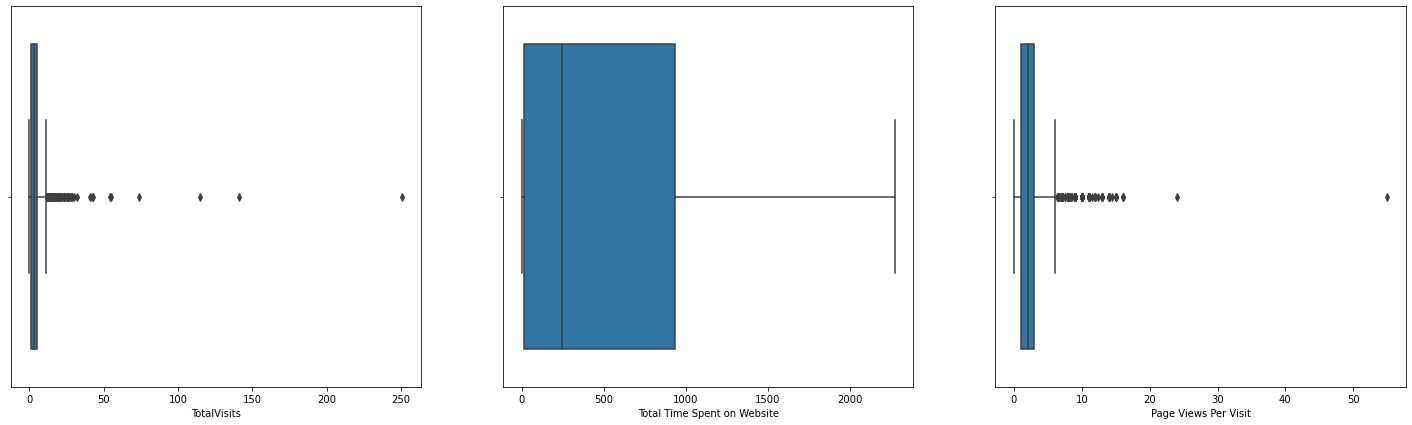

In [627]:
# outliers are present for numeric variables
#plt.figure(figsize=(20, 12))
f, ax = plt.subplots(1, 3, figsize=(25,7))
sns.boxplot(data=inp0, x='TotalVisits',ax=ax[0])
sns.boxplot(data=inp0, x= "Total Time Spent on Website", ax=ax[1])
sns.boxplot(data= inp0, x= "Page Views Per Visit", ax=ax[2])
plt.show()

- Outliers present in both `TotalVisits` and `Page Views Per Visit`

##### Removing outliers for further analysis

In [1613]:
outliers_df = inp0.copy()

In [1614]:
# Removing outliers: TotalVisits
Q1 = outliers_df['TotalVisits'].quantile(0.05)
Q3 = outliers_df['TotalVisits'].quantile(0.95)
IQR = Q3 - Q1
outliers_TotalVisits = outliers_df[(outliers_df['TotalVisits'] >= Q1 - 2*IQR) & (outliers_df['TotalVisits'] <= Q3 + 2*IQR)]

In [1615]:
outliers_TotalVisits.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9230.000000,9230.000000,9230.000000,9230.000000,9230.000000
mean,617191.426436,0.385699,3.350488,487.650379,2.349282
std,23410.374362,0.486786,3.394736,548.080646,2.071524
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596479.250000,0.000000,1.000000,12.000000,1.000000
50%,615494.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.750000,1.000000,5.000000,936.000000,3.000000
90%,650507.400000,1.000000,7.000000,1380.000000,5.000000
95%,655404.550000,1.000000,9.000000,1562.000000,6.000000
99%,659594.780000,1.000000,16.000000,1840.710000,9.000000


<Figure size 360x288 with 0 Axes>

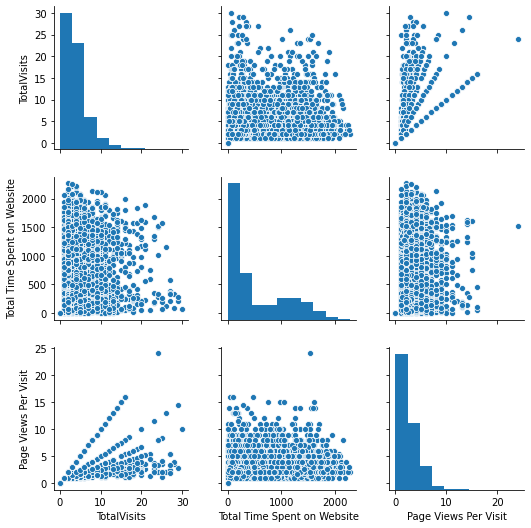

In [1616]:
cols=['TotalVisits',"Total Time Spent on Website","Page Views Per Visit"]
plt.figure(figsize = (5,4))
sns.pairplot(outliers_TotalVisits[cols])
plt.show()

In [1617]:
# Removing outliers: Page Views Per Visit
Q1 = outliers_TotalVisits['Page Views Per Visit'].quantile(0.05)
Q3 = outliers_TotalVisits['Page Views Per Visit'].quantile(0.95)
IQR = Q3 - Q1
outliers_Page_Views = outliers_TotalVisits[(outliers_df['Page Views Per Visit'] >= Q1 - 2*IQR) & (outliers_TotalVisits['Page Views Per Visit'] <= Q3 + 2*IQR)]

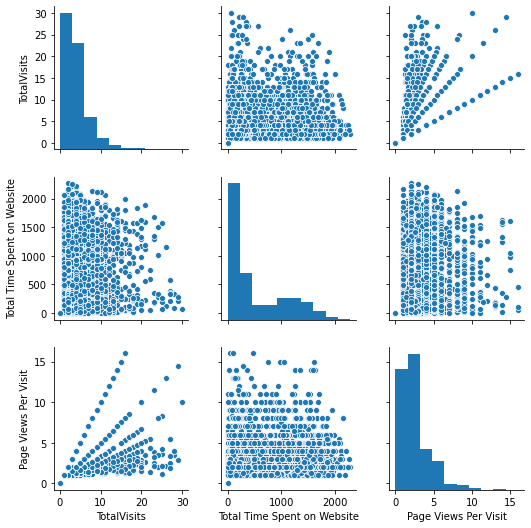

In [1618]:
cols=['TotalVisits',"Total Time Spent on Website","Page Views Per Visit"]
sns.pairplot(outliers_Page_Views[cols])
plt.show()

In [1619]:
outliers_Page_Views.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,617193.551522,0.385632,3.348250,487.537761,2.346936
std,23410.752445,0.486771,3.388107,548.003533,2.059338
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596478.000000,0.000000,1.000000,12.000000,1.000000
50%,615500.000000,0.000000,3.000000,248.000000,2.000000
75%,637388.000000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,30.000000,2272.000000,16.000000


In [1620]:
outliers_Page_Views.shape

(9229, 16)

In [1621]:
outliers_Page_Views.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9229.000000,9229.000000,9229.000000,9229.000000,9229.000000
mean,617193.551522,0.385632,3.348250,487.537761,2.346936
std,23410.752445,0.486771,3.388107,548.003533,2.059338
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596478.000000,0.000000,1.000000,12.000000,1.000000
50%,615500.000000,0.000000,3.000000,248.000000,2.000000
75%,637388.000000,1.000000,5.000000,936.000000,3.000000
90%,650507.800000,1.000000,7.000000,1380.000000,5.000000
95%,655404.600000,1.000000,9.000000,1562.000000,6.000000
99%,659594.960000,1.000000,16.000000,1840.720000,9.000000


In [1622]:
inp1 = outliers_Page_Views.copy()

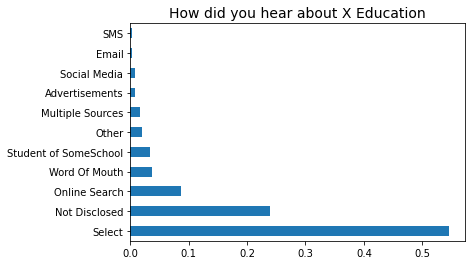

In [1623]:
inp1['How did you hear about X Education'].value_counts(normalize=True).plot.barh()
plt.title('How did you hear about X Education', fontsize=14)
plt.show()

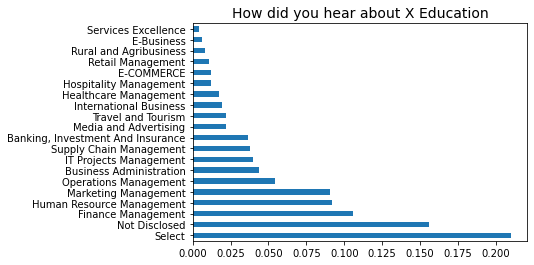

In [1624]:
inp1['Specialization'] = inp0['Specialization'].value_counts(normalize=True).plot.barh()
plt.title('How did you hear about X Education', fontsize=14)
plt.show()

`Specialization` and `How did you hear about X Education` are having 29% missing values and 
very high ratio of not selecting any options. Hence, dropping these two variables

In [1625]:
# Dropping columns having only "No" selected
inp1.drop(['Specialization', 'How did you hear about X Education'],inplace=True, axis=1)

### Univariate Analysis

####  Univariate Analysis on Numeric features

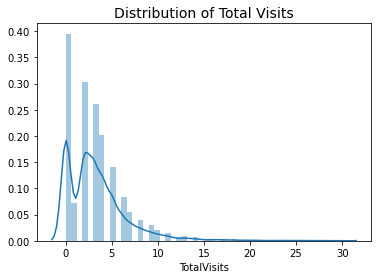

In [1626]:
# Remiving biasness
sns.distplot(inp1['TotalVisits'])
plt.title('Distribution of Total Visits', fontsize=14)
plt.show()

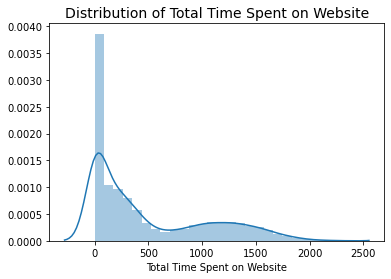

In [1627]:
# Total Time Spent on Website
sns.distplot(inp1['Total Time Spent on Website'])
plt.title('Distribution of Total Time Spent on Website', fontsize=14)
plt.show()

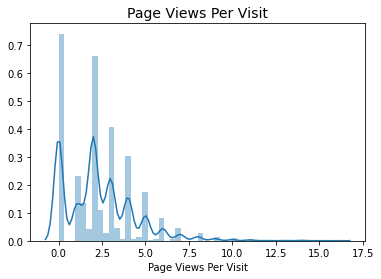

In [1628]:
# Page Views Per Visit
sns.distplot(inp1['Page Views Per Visit'])
plt.title('Page Views Per Visit', fontsize=14)
plt.show()

In [1629]:
inp1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Text(0.5, 1.0, 'Target Variable Distribution')

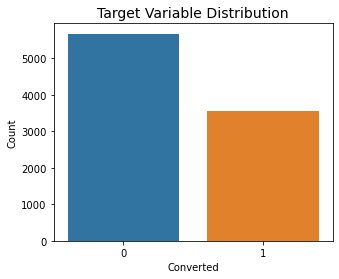

In [1630]:
plt.figure(figsize = (5,4))
sns.countplot(inp1['Converted'])
plt.ylabel('Count')
plt.xlabel('Converted')
plt.title('Target Variable Distribution', fontsize=14)

In [1631]:
### Checking the conversion rate
Converted = (sum(inp1['Converted'])/len(inp1['Converted'].index))*100
print('Lead conversion rate: {}'.format(Converted))

Lead conversion rate: 38.56322461805179


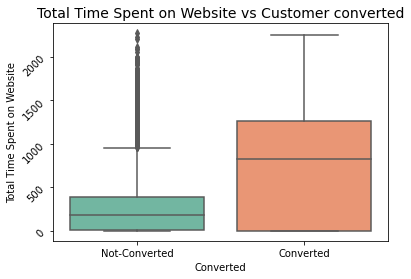

In [1632]:
# Lead Origin
# Lead Source
# Do not Email
# Do not Call
# Last Activity
# What is your current occupation
# Search
#plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="holiday", y="cnt",estimator=np.median)
ax = sns.boxplot(data=inp1, y="Total Time Spent on Website", x="Converted",palette='Set2')
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")
plt.title('Total Time Spent on Website vs Customer converted', fontsize=14)
plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Not-Converted','Converted'])
plt.show()


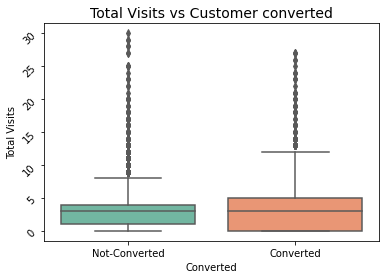

In [1633]:
#plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="holiday", y="cnt",estimator=np.median)
ax = sns.boxplot(data=inp1, y="TotalVisits", x="Converted",palette='Set2')
plt.xlabel("Converted")
plt.ylabel("Total Visits")
plt.title('Total Visits vs Customer converted', fontsize=14)
plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Not-Converted','Converted'])
plt.show()

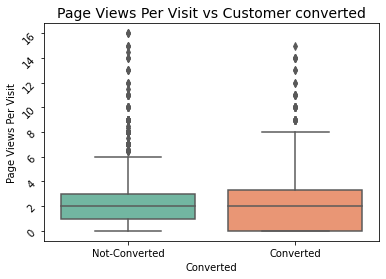

In [1634]:
#plt.figure(figsize = (7,5))
#sns.barplot(data=inp0, x="holiday", y="cnt",estimator=np.median)
ax = sns.boxplot(data=inp1, y="Page Views Per Visit", x="Converted",palette='Set2')
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")
plt.title('Page Views Per Visit vs Customer converted', fontsize=14)
plt.yticks(rotation=45, horizontalalignment="right")
ax.set_xticklabels(['Not-Converted','Converted'])
plt.show()

#### `Inferences`
- 'TotalVisits','Total Time Spent on Website', 'Page Views Per Visit' are having high conversion rate.

### Bivariate Analysis
- Lead Origin
- Lead Source
- Do not Email
- Do not Call
- Last Activity
- What is your current occupation
- Search

In [1635]:
# dividing data frame into two subsets based on target variable.
target_0 = inp1[inp1['Converted']==0]
target_1 = inp1[inp1['Converted']==1]


In [1636]:
target_0['TARGET'] = 'Not Converted'
target_1['TARGET'] = 'Converted'

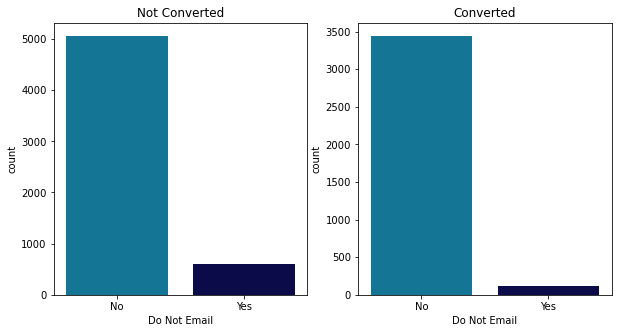

In [1637]:
# Do Not Email for defaulters and non-defaulters 
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10, 5))

sns.countplot(x = 'Do Not Email', data = target_0, palette = 'ocean_r',ax=ax)
ax.set_title("Not Converted")
sns.countplot(x = 'Do Not Email', data = target_1, palette = 'ocean_r',ax=ax2)
ax2.set_title("Converted")
plt.show()

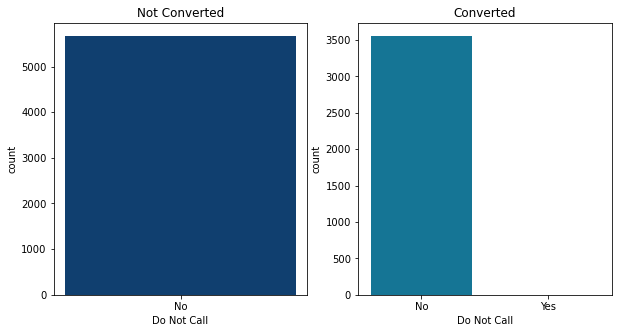

In [1638]:
# Do Not Email for defaulters and non-defaulters 
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10, 5))

sns.countplot(x = 'Do Not Call', data = target_0, palette = 'ocean_r',ax=ax)
ax.set_title("Not Converted")
sns.countplot(x = 'Do Not Call', data = target_1, palette = 'ocean_r',ax=ax2)
ax2.set_title("Converted")
plt.show()

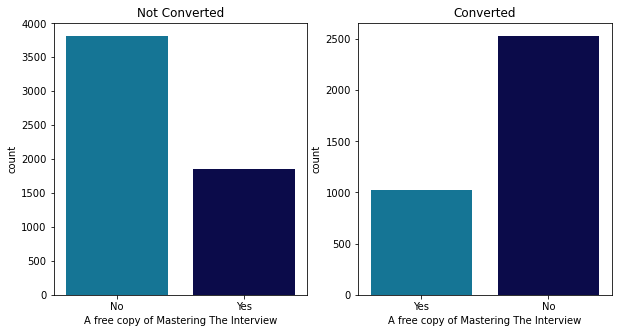

In [1639]:
# A free copy of Mastering The Interview: for Converted and Not Converted
fig, (ax,ax2) = plt.subplots(ncols=2,figsize=(10, 5))

sns.countplot(x = 'A free copy of Mastering The Interview', data = target_0, palette = 'ocean_r',ax=ax)
ax.set_title("Not Converted")
sns.countplot(x = 'A free copy of Mastering The Interview', data = target_1, palette = 'ocean_r',ax=ax2)
ax2.set_title("Converted")
plt.show()

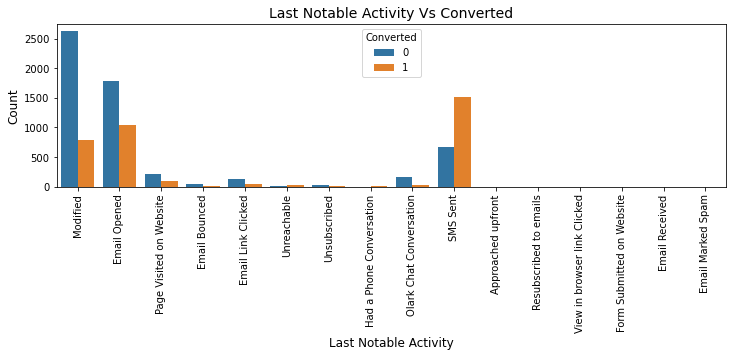

In [1640]:
# Last Notable Activity
plt.figure(figsize = (12,3))
plot = sns.countplot(data=inp1,x="Last Notable Activity", hue = "Converted");
plt.title('Last Notable Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Notable Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
_ = plt.setp(plot.get_xticklabels(), rotation=90)
plt.show()

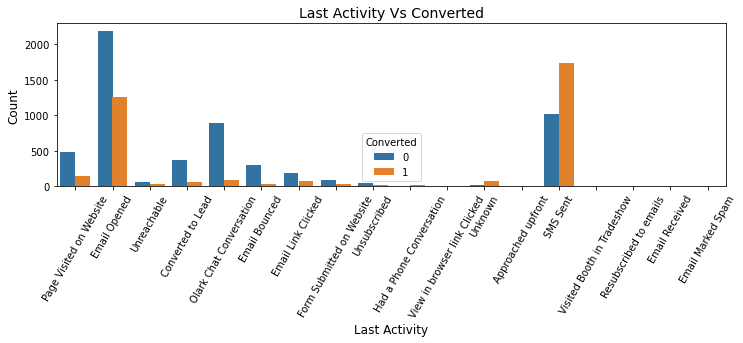

In [1642]:
# Last Notable Activity
plt.figure(figsize = (12,3))
plot = sns.countplot(data=inp1,x="Last Activity", hue = "Converted");
plt.title('Last Activity Vs Converted', fontsize = 14)
plt.xlabel("Last Activity", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
_ = plt.setp(plot.get_xticklabels(), rotation=60)
plt.show()

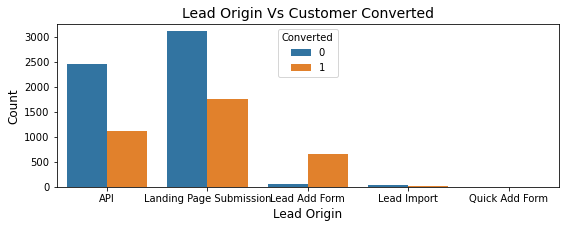

In [1647]:
# Lead Origin
plt.figure(figsize = (9,3))
plot = sns.countplot(data=inp1,x="Lead Origin", hue = "Converted");
plt.title('Lead Origin Vs Customer Converted', fontsize = 14)
plt.xlabel("Lead Origin", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
#_ = plt.setp(plot.get_xticklabels(), rotation=40)
plt.show()

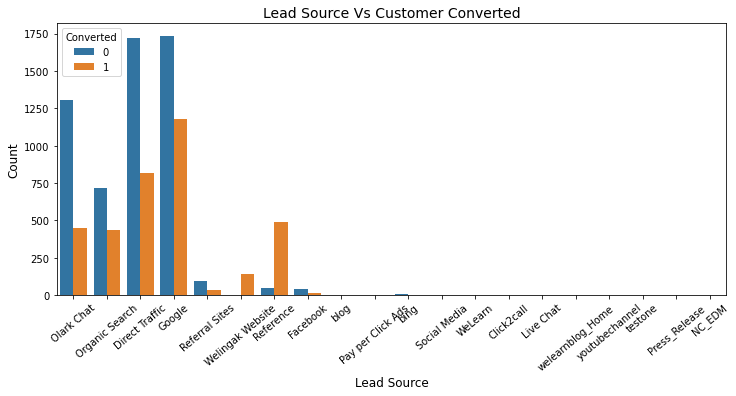

In [1249]:
# Lead Source
plt.figure(figsize = (12,5))
plot = sns.countplot(data=inp1,x="Lead Source", hue = "Converted");
plt.title('Lead Source Vs Customer Converted', fontsize = 14)
plt.xlabel("Lead Source", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
_ = plt.setp(plot.get_xticklabels(), rotation=40)
plt.show()

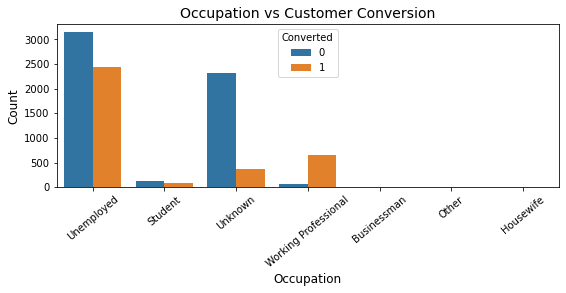

In [1645]:
plt.figure(figsize = (9,3))
plot = sns.countplot(data=inp1,x="What is your current occupation", hue = "Converted");
plt.title('Occupation vs Customer Conversion', fontsize = 14)
plt.xlabel("Occupation", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
_ = plt.setp(plot.get_xticklabels(), rotation=40)
plt.show()

`Inferences`
- Working professionals and people who are unemployed are having high conversion rate. 
- Conversion rate for housewife is 100% 



In [1251]:
inp1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

### Data Preparation

In [1252]:
#### Converting some binary variables (Yes/No) to 0/1
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call', 'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
inp1[varlist] = inp1[varlist].apply(binary_map)

In [1253]:
inp1.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,Modified


In [1254]:
# Creating dummies for the following columns below
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(inp1[['Lead Origin', 'Lead Source', 
                              'Last Activity', 'Last Notable Activity',
                              'What is your current occupation']], drop_first=True)

# Adding the results to the master dataframe
inp1 = pd.concat([inp1, dummy1], axis=1)

In [1255]:
inp1.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Origin_Quick Add Form',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn',
       'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_testone', 'Lead Source_welearnblog_Home',
   

In [1256]:
inp1.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 
           'Lead Source', 'Last Activity',
            'What is your current occupation', 'Last Notable Activity'], inplace=True, axis=1)
    

In [1257]:
inp1.shape

(9229, 68)

In [1258]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [1259]:
X = inp1.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,2.0,1532,2.0,1,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,2.0,1428,1.0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [1260]:
# Putting response variable to y

y = inp1['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [1261]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [1262]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,...,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Unknown,What is your current occupation_Working Professional
3333,0,0,0.033333,0.106954,0.06250,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
712,0,0,0.033333,0.066461,0.06250,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3937,0,0,0.066667,0.633363,0.12500,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6635,0,0,0.166667,0.074384,0.15625,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2991,0,0,0.100000,0.142165,0.18750,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


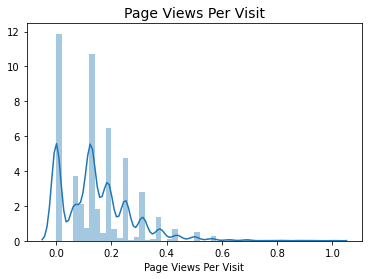

In [1263]:
# Remiving biasness
sns.distplot(X_train['Page Views Per Visit'])
plt.title('Page Views Per Visit', fontsize=14)
plt.show()

In [1264]:
### Checking the Churn Rate
Converted = (sum(inp1['Converted'])/len(inp1['Converted'].index))*100
print('Lead conversion rate: {}'.format(Converted))

Lead conversion rate: 38.56322461805179


### Correlations Analysis

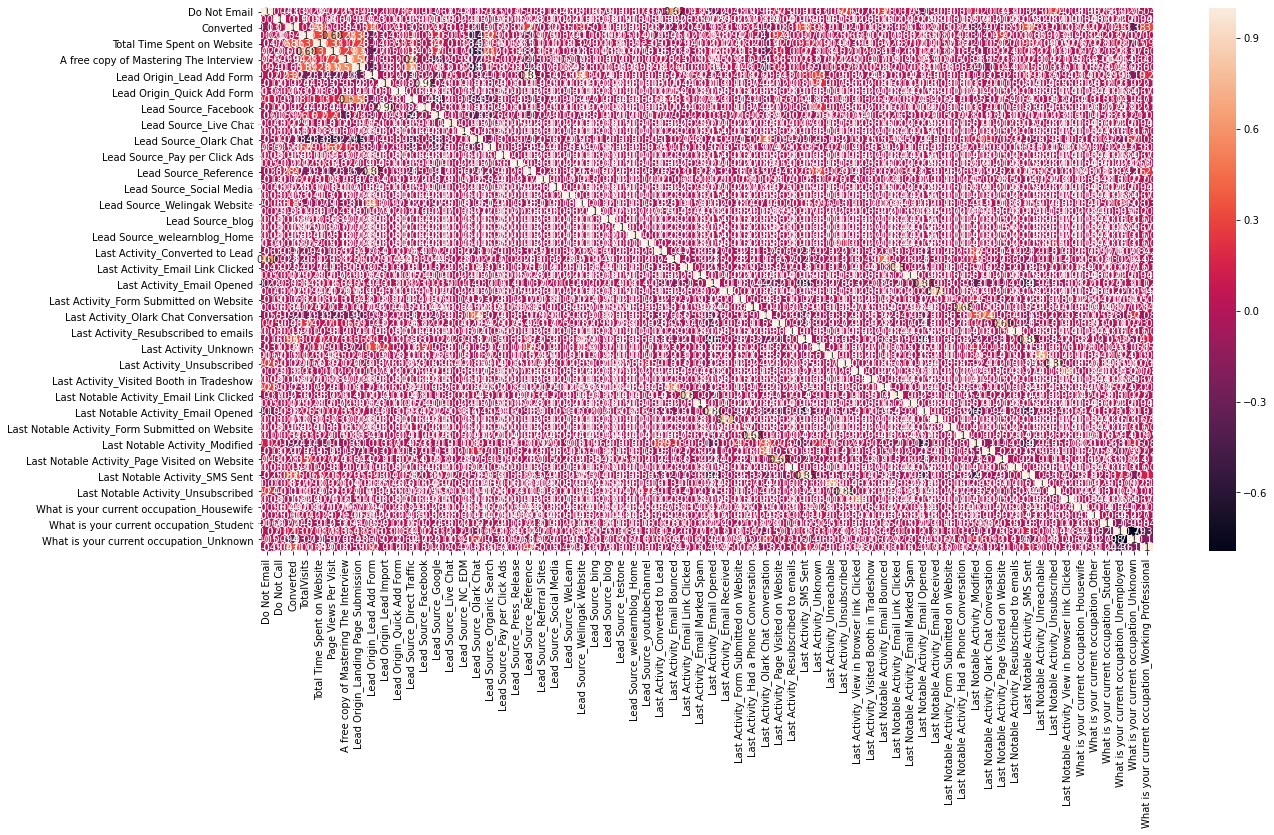

In [1265]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(inp1.corr(),annot = True)
plt.show()

### Model Building

#### Logit model 1: 

In [1266]:
import statsmodels.api as sm

In [1267]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6397
Model Family:                Binomial   Df Model:                           62
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2520.1
Date:                Mon, 11 Jan 2021   Deviance:                       5040.2
Time:                        21:10:45   Pearson chi2:                 6.69e+03
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.9649   8.13e+04      0.000      1.000   -1.59e+05    1.59e+05
Do Not Email                                            -1.1022      0.208     -5.296      0.000      -1.510      -0.694
Do Not Call                                             23.0955   5.42e+04      0.000      1.000   -1.06e+05    1.06e+05
TotalVisits                                              2.5322      0.456      5.549      0.000       1.638       3.427
Total Time Spent on Website                              4.6899      0.171     27.433      0.000       4.355       5.025
Page Views Per Visit                                    -2.3165      0.443     -5.226      0.000      -3.185      -1.448
A free copy of Mastering The Interview                  -0.0979      0.111     -0.885      0.376      -0.315       0.119
Lead Origin_Landing Page Submission                     -0.1625      0.109     -1.484      0.138      -0.377       0.052
Lead Origin_Lead Add Form                                2.6846      0.534      5.032      0.000       1.639       3.730
Lead Origin_Lead Import                                 24.6080   1.02e+05      0.000      1.000      -2e+05       2e+05
Lead Origin_Quick Add Form                              22.9137   7.69e+04      0.000      1.000   -1.51e+05    1.51e+05
Lead Source_Direct Traffic                               0.2349      1.356      0.173      0.863      -2.424       2.894
Lead Source_Facebook                                   -23.7783   1.02e+05     -0.000      1.000      -2e+05       2e+05
Lead Source_Google                                       0.6623      1.351      0.490      0.624      -1.986       3.311
Lead Source_Live Chat                                   21.9215   8.91e+04      0.000      1.000   -1.75e+05    1.75e+05
Lead Source_NC_EDM                                      24.6719    7.3e+04      0.000      1.000   -1.43e+05    1.43e+05
Lead Source_Olark Chat                                   1.5148      1.359      1.115      0.265      -1.148       4.178
Lead Source_Organic Search                               0.5066      1.357      0.373      0.709      -2.154       3.167
Lead Source_Pay per Click Ads                          -21.2388   7.59e+04     -0.000      1.000   -1.49e+05    1.49e+05
Lead Source_Press_Release                              1.81e-09   4.01e-06      0.000      1.000   -7.85e-06    7.86e-06
Lead Source_Reference                                    1.0291      1.262      0.815      0.415      -1.444       3.502
Lead Source_Referral Sites                               0.5766      1.387      0.416      0.678      -2.143       3.296
Lead Source_Social Media                                 2

### Feature Selection Using RFE

In [1268]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1269]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 13 variables as output
rfe = rfe.fit(X_train, y_train)

In [1270]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('A free copy of Mastering The Interview', False, 39),
 ('Lead Origin_Landing Page Submission', False, 30),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 35),
 ('Lead Origin_Quick Add Form', False, 19),
 ('Lead Source_Direct Traffic', False, 11),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 23),
 ('Lead Source_Live Chat', False, 40),
 ('Lead Source_NC_EDM', False, 6),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 21),
 ('Lead Source_Pay per Click Ads', False, 31),
 ('Lead Source_Press_Release', False, 48),
 ('Lead Source_Reference', False, 9),
 ('Lead Source_Referral Sites', False, 22),
 ('Lead Source_Social Media', False, 8),
 ('Lead Source_WeLearn', False, 29),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 20),
 

In [1271]:
col = X_train.columns[rfe.support_]

In [1272]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Email Opened', 'Last Activity_Email Received',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to

##### Assessing the model with StatsModels

#### Logit model 2: 

In [1273]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6439
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2569.9
Date:                Mon, 11 Jan 2021   Deviance:                       5139.8
Time:                        21:10:49   Pearson chi2:                 6.74e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4808      0.111     -4.327      0.000      -0.699      -0.263
Do Not Email                                            -1.2200      0.189     -6.449      0.000      -1.591      -0.849
TotalVisits                                              2.3514      0.439      5.361      0.000       1.492       3.211
Total Time Spent on Website                              4.6958      0.169     27.858      0.000       4.365       5.026
Page Views Per Visit                                    -2.3352      0.422     -5.536      0.000      -3.162      -1.508
Lead Origin_Lead Add Form                                3.3784      0.208     16.269      0.000       2.971       3.785
Lead Source_Olark Chat                                   1.1615      0.124      9.381      0.000       0.919       1.404
Lead Source_Welingak Website                             2.1158      0.740      2.858      0.004       0.665       3.567
Last Activity_Converted to Lead                         -1.2090      0.234     -5.164      0.000      -1.668      -0.750
Last Activity_Email Bounced                             -1.1882      0.341     -3.480      0.001      -1.857      -0.519
Last Activity_Olark Chat Conversation                   -1.3309      0.195     -6.828      0.000      -1.713      -0.949
Last Activity_Unknown                                   -1.4946      0.448     -3.336      0.001      -2.373      -0.616
Last Notable Activity_Email Link Clicked                -1.6512      0.259     -6.385      0.000      -2.158      -1.144
Last Notable Activity_Email Opened                      -1.3191      0.090    -14.692      0.000      -1.495      -1.143
Last Notable Activity_Modified                          -1.5745      0.103    -15.287      0.000      -1.776      -1.373
Last Notable Activity_Olark Chat Conversation           -1.3407      0.383     -3.496      0.000      -2.092      -0.589
Last Notable Activity_Page Visited on Website           -2.1062      0.224     -9.419      0.000      -2.544      -1.668
Last Notable Activity_Unreachable                        0.2700      0.512      0.528      0.598      -0.733       1.273
What is your current occupation_Housewife               21.9684   1.16e+04      0.002      0.998   -2.27e+04    2.28e+04
What is your current occupation_Unknown                 -1.1850      0.089    -13.293      0.000      -1.360      -1.010
What is your current occupation_Working Professional     2.3431      0.178     13.155      0.000       1.994       2.692
========================================================================================================================
"""

In [1274]:
# dropping What is your current occupation_Housewife
col = col.drop('What is your current occupation_Housewife',1)


#### Logit model 3: 

In [1275]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6440
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.2
Date:                Mon, 11 Jan 2021   Deviance:                       5148.3
Time:                        21:10:49   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4746      0.111     -4.274      0.000      -0.692      -0.257
Do Not Email                                            -1.2215      0.189     -6.459      0.000      -1.592      -0.851
TotalVisits                                              2.3409      0.438      5.339      0.000       1.482       3.200
Total Time Spent on Website                              4.6905      0.168     27.844      0.000       4.360       5.021
Page Views Per Visit                                    -2.3449      0.422     -5.561      0.000      -3.171      -1.518
Lead Origin_Lead Add Form                                3.3778      0.207     16.279      0.000       2.971       3.784
Lead Source_Olark Chat                                   1.1538      0.124      9.328      0.000       0.911       1.396
Lead Source_Welingak Website                             2.1017      0.740      2.839      0.005       0.651       3.553
Last Activity_Converted to Lead                         -1.2160      0.234     -5.197      0.000      -1.675      -0.757
Last Activity_Email Bounced                             -1.1902      0.341     -3.487      0.000      -1.859      -0.521
Last Activity_Olark Chat Conversation                   -1.3346      0.195     -6.850      0.000      -1.716      -0.953
Last Activity_Unknown                                   -1.4589      0.444     -3.284      0.001      -2.330      -0.588
Last Notable Activity_Email Link Clicked                -1.6508      0.259     -6.382      0.000      -2.158      -1.144
Last Notable Activity_Email Opened                      -1.3142      0.090    -14.647      0.000      -1.490      -1.138
Last Notable Activity_Modified                          -1.5689      0.103    -15.251      0.000      -1.771      -1.367
Last Notable Activity_Olark Chat Conversation           -1.3339      0.383     -3.480      0.001      -2.085      -0.583
Last Notable Activity_Page Visited on Website           -2.1043      0.224     -9.414      0.000      -2.542      -1.666
Last Notable Activity_Unreachable                        0.2706      0.512      0.529      0.597      -0.732       1.274
What is your current occupation_Unknown                 -1.1884      0.089    -13.337      0.000      -1.363      -1.014
What is your current occupation_Working Professional     2.3381      0.178     13.129      0.000       1.989       2.687
========================================================================================================================
"""

In [1276]:
# dropping Last Notable Activity_Unreachable','Last Activity_Unreachable'
col = col.drop(['Last Notable Activity_Unreachable'],1)


#### Logit model 4: 

In [1277]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res4 = logm4.fit()
res4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6460
Model:                            GLM   Df Residuals:                     6441
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2574.3
Date:                Mon, 11 Jan 2021   Deviance:                       5148.6
Time:                        21:10:50   Pearson chi2:                 6.75e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4701      0.111     -4.245      0.000      -0.687      -0.253
Do Not Email                                            -1.2242      0.189     -6.474      0.000      -1.595      -0.854
TotalVisits                                              2.3442      0.438      5.347      0.000       1.485       3.203
Total Time Spent on Website                              4.6893      0.168     27.841      0.000       4.359       5.019
Page Views Per Visit                                    -2.3453      0.422     -5.562      0.000      -3.172      -1.519
Lead Origin_Lead Add Form                                3.3782      0.207     16.281      0.000       2.972       3.785
Lead Source_Olark Chat                                   1.1531      0.124      9.323      0.000       0.911       1.396
Lead Source_Welingak Website                             2.1009      0.740      2.838      0.005       0.650       3.552
Last Activity_Converted to Lead                         -1.2158      0.234     -5.196      0.000      -1.674      -0.757
Last Activity_Email Bounced                             -1.1896      0.341     -3.485      0.000      -1.859      -0.521
Last Activity_Olark Chat Conversation                   -1.3345      0.195     -6.850      0.000      -1.716      -0.953
Last Activity_Unknown                                   -1.4589      0.444     -3.284      0.001      -2.330      -0.588
Last Notable Activity_Email Link Clicked                -1.6556      0.258     -6.405      0.000      -2.162      -1.149
Last Notable Activity_Email Opened                      -1.3190      0.089    -14.773      0.000      -1.494      -1.144
Last Notable Activity_Modified                          -1.5737      0.103    -15.352      0.000      -1.775      -1.373
Last Notable Activity_Olark Chat Conversation           -1.3389      0.383     -3.494      0.000      -2.090      -0.588
Last Notable Activity_Page Visited on Website           -2.1093      0.223     -9.444      0.000      -2.547      -1.672
What is your current occupation_Unknown                 -1.1862      0.089    -13.330      0.000      -1.361      -1.012
What is your current occupation_Working Professional     2.3384      0.178     13.131      0.000       1.989       2.687
========================================================================================================================
"""

#### Logit model 5: 

In [1278]:
#X_train_sm = sm.add_constant(X_train[col])
#logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res5 = logm5.fit()
#res5.summary()

In [1279]:
#dropping Last Notable Activity_Had a Phone Conversation
#col = col.drop(['Last Activity_Unreachable'],1)


In [1280]:
#X_train_sm = sm.add_constant(X_train[col])
#logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
#res6 = logm6.fit()
#res6.summary()

#### Checking VIF

In [1281]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1282]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Page Views Per Visit,4.69
1,TotalVisits,4.34
13,Last Notable Activity_Modified,2.79
9,Last Activity_Olark Chat Conversation,2.06
2,Total Time Spent on Website,1.95
0,Do Not Email,1.82
12,Last Notable Activity_Email Opened,1.81
8,Last Activity_Email Bounced,1.78
5,Lead Source_Olark Chat,1.75
16,What is your current occupation_Unknown,1.60


In [1284]:
# Getting the predicted values on the train set

y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

3333    0.017764
712     0.046692
3937    0.967151
6635    0.032527
2991    0.074883
7999    0.052627
4330    0.830490
6819    0.933351
1050    0.579724
8706    0.035417
dtype: float64

In [1286]:
# Getting the predicted values on the train set

y_train_pred = res4.predict(X_train_sm)
y_train_pred[:10]

3333    0.017764
712     0.046692
3937    0.967151
6635    0.032527
2991    0.074883
7999    0.052627
4330    0.830490
6819    0.933351
1050    0.579724
8706    0.035417
dtype: float64

In [1287]:
#Creating a dataframe with the actual converted flag and the predicted probabilities

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Lead Number'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number
3333,0,0.017764,3333
712,0,0.046692,712
3937,1,0.967151,3937
6635,0,0.032527,6635
2991,0,0.074883,2991


In [1288]:
#Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0¶

y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted
3333,0,0.017764,3333,0
712,0,0.046692,712,0
3937,1,0.967151,3937,1
6635,0,0.032527,6635,0
2991,0,0.074883,2991,0


## Model Evaluation

In [1289]:
from sklearn import metrics

In [1290]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3511  447]
 [ 711 1791]]


In [1291]:
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))


0.8207430340557276


In [1292]:

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1293]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7158273381294964

In [1294]:
# Let us calculate specificity
TN / float(TN+FP)

0.8870641738251642

In [1295]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.11293582617483577


In [1296]:
# positive predictive value 
print (TP / float(TP+FP))

0.8002680965147453


In [1297]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8315963998105164


In [1298]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1299]:
y_train_pred_final.columns

Index(['Converted', 'Converted_Prob', 'Lead Number', 'predicted'], dtype='object')

In [1300]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

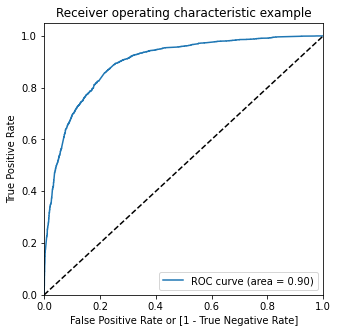

In [1301]:
draw_roc( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

`Inference`
- ROC curve is far away from 45 degreedigonal line, hence the trained model is good.
- it clearly shows the tradeoff between sensitivity and specificity

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [1302]:
# Create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head(100)

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3333,0,0.017764,3333,0,1,0,0,0,0,0,0,0,0,0
712,0,0.046692,712,0,1,0,0,0,0,0,0,0,0,0
3937,1,0.967151,3937,1,1,1,1,1,1,1,1,1,1,1
6635,0,0.032527,6635,0,1,0,0,0,0,0,0,0,0,0
2991,0,0.074883,2991,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5885,0,0.031944,5885,0,1,0,0,0,0,0,0,0,0,0
5805,1,0.994762,5805,1,1,1,1,1,1,1,1,1,1,1
7456,1,0.093051,7456,0,1,0,0,0,0,0,0,0,0,0
7792,0,0.097518,7792,0,1,0,0,0,0,0,0,0,0,0


In [2]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
import pandas as pd
from sklearn.metrics import confusion_matrix
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

NameError: name 'metrics' is not defined

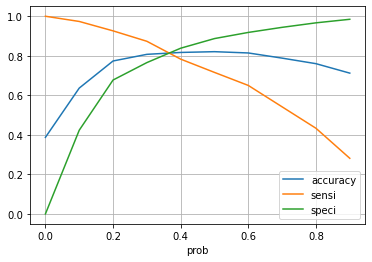

In [1304]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], grid=True)
plt.show()

- From the curve above, 0.36 is the optimum point to take it as a cutoff probability.

In [1526]:
# Let us make the final prediction using 0.36 as the cut off
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.33 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
3333,0,0.017764,3333,0,1,0,0,0,0,0,0,0,0,0,0,2
712,0,0.046692,712,0,1,0,0,0,0,0,0,0,0,0,0,5
3937,1,0.967151,3937,1,1,1,1,1,1,1,1,1,1,1,1,97
6635,0,0.032527,6635,0,1,0,0,0,0,0,0,0,0,0,0,3
2991,0,0.074883,2991,0,1,0,0,0,0,0,0,0,0,0,0,7


In [1527]:

# Now let us calculate the lead score

y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(50)

,Converted,Converted_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
3333,0,0.017764,3333,0,1,0,0,0,0,0,0,0,0,0,0,2
712,0,0.046692,712,0,1,0,0,0,0,0,0,0,0,0,0,5
3937,1,0.967151,3937,1,1,1,1,1,1,1,1,1,1,1,1,97
6635,0,0.032527,6635,0,1,0,0,0,0,0,0,0,0,0,0,3
2991,0,0.074883,2991,0,1,0,0,0,0,0,0,0,0,0,0,7
7999,0,0.052627,7999,0,1,0,0,0,0,0,0,0,0,0,0,5
4330,1,0.830490,4330,1,1,1,1,1,1,1,1,1,1,0,1,83
6819,1,0.933351,6819,1,1,1,1,1,1,1,1,1,1,1,1,93
1050,1,0.579724,1050,1,1,1,1,1,1,1,0,0,0,0,1,58
8706,0,0.035417,8706,0,1,0,0,0,0,0,0,0,0,0,0,4


In [1528]:
# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2153
0     349
Name: final_predicted, dtype: int64

In [1529]:
print("Final predicted conversions rate: {}".format(str(2163/float(2163+506))))


Final predicted conversions rate: 0.8104158860996628


Final predicted conversions rate i.e. ~81% is quite good and meeting the X Educations CEO's requirement as well.

### Check overall metrices

In [1530]:
# Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8102167182662539

In [1531]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3081,  877],
       [ 349, 2153]], dtype=int64)

In [1532]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1533]:
# Let's see the sensitivity of our logistic regression model
print("sensitivity: {}".format(str(TP / float(TP+FN))))
      
# Let us calculate specificity
print("specificity: {}".format(str(TN / float(TN+FP))))



sensitivity: 0.8605115907274181
specificity: 0.7784234461849419


In [1649]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(str(TP / float(TP+FN))))
      
# Let us calculate specificity
print("Specificity: {}".format(str(TN / float(TN+FP))))



# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate - predicting converted when lead does not converted: {}".format(str(FP/ float(TN+FP))))
# Positive predictive value 
print("Positive predictive value: {}".format(str(TP / float(TP+FP))))

# Negative predictive value
print("Negative predictive value: {}".format(str(TN / float(TN+ FN))))
print("Precision Score: {}".format(str(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))))
print("Recall Score: {}".format(str(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))))

Sensitivity: 0.5931882686849574
Specificity: 0.8773364485981309
False postive rate - predicting converted when lead does not converted: 0.12266355140186916
Positive predictive value: 0.7491039426523297
Negative predictive value: 0.777432712215321
Precision Score: 0.8002680965147453
Recall Score: 0.7158273381294964


## Precision and Recall

In [1651]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3081,  877],
       [ 349, 2153]], dtype=int64)

In [1652]:
from sklearn.metrics import precision_score, recall_score


In [1653]:
print("Precision Score: {}".format(str(precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted))))
print("Recall Score: {}".format(str(recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted))))

Precision Score: 0.8002680965147453
Recall Score: 0.7158273381294964


In [1654]:
from sklearn.metrics import precision_recall_curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


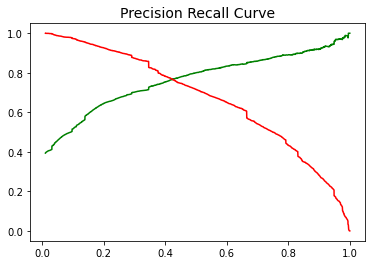

In [1655]:
plt.title('Precision Recall Curve', fontsize=14)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()


### Making predictions on the test set

In [1656]:
col1

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [1657]:
col1 = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
X_test[col1] = scaler.transform(X_test[col1])

In [1658]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Unknown,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,What is your current occupation_Unknown,What is your current occupation_Working Professional
7494,0,3.200732e-10,5.087903e-22,2.607703e-08,0,0,0,0,0,0,0,0,0,0,0,0,0,0
496,0,2.286237e-10,4.255919e-22,1.862645e-08,0,0,0,0,0,1,0,0,0,1,0,0,1,0
5830,0,0.000000e+00,0.000000e+00,0.000000e+00,0,1,0,0,0,1,0,0,0,1,0,0,1,0
7286,0,9.144947e-11,7.359860e-23,7.450581e-09,0,0,0,1,0,0,0,0,0,1,0,0,0,0
5311,0,0.000000e+00,0.000000e+00,0.000000e+00,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [1659]:
X_test_sm = sm.add_constant(X_test)


In [1660]:
#Making predictions on the test set
y_test_pred = res4.predict(X_test_sm)


In [1661]:
y_test_pred.head()

7494    0.384586
496     0.010308
5830    0.031944
7286    0.036984
5311    0.274372
dtype: float64

In [1662]:

# Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [1663]:
y_test_df = pd.DataFrame(y_test)

In [1664]:
# Putting LeadId to index

y_test_df['LeadId'] = y_test_df.index

In [1665]:
#removing index
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1666]:
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)


In [1667]:
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})


In [1689]:
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)


In [1690]:
y_pred_final.head()


,Converted,LeadId,Conversion_Prob,final_predicted,lead_score
0,0,7494,0.384586,1,38
1,0,496,0.010308,0,1
2,0,5830,0.031944,0,3
3,0,7286,0.036984,0,4
4,0,5311,0.274372,0,27


In [1691]:
# Now let us calculate the lead score

y_pred_final['lead_score'] = y_pred_final.Conversion_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,Converted,LeadId,Conversion_Prob,final_predicted,lead_score
0,0,7494,0.384586,1,38
1,0,496,0.010308,0,1
2,0,5830,0.031944,0,3
3,0,7286,0.036984,0,4
4,0,5311,0.274372,0,27
5,1,9066,0.114682,0,11
6,0,7611,0.038052,0,4
7,0,8069,0.901494,1,90
8,1,1035,0.036984,0,4
9,0,5963,0.040059,0,4


In [1692]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion or non conversion counts from the actual converted rates

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    597
0    460
Name: final_predicted, dtype: int64

In [1693]:

# check the precentage of final_predicted conversions on test data

797/float(797+218)

0.7852216748768472

- Final predicted conversions rate i.e. ~79% is quite good for test data and meeting the X Educations CEO's requirement as well.

### Evaluetion metrics for test data

In [1694]:
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)


0.7724810400866738

In [1695]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1542,  170],
       [ 460,  597]], dtype=int64)

In [1696]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [1697]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity: {}".format(str(TP / float(TP+FN))))
      
# Let us calculate specificity
print("Specificity: {}".format(str(TN / float(TN+FP))))
print("Precision Score: {}".format(str(precision_score(y_pred_final.Converted, y_pred_final.final_predicted))))
print("Recall Score: {}".format(str(recall_score(y_pred_final.Converted, y_pred_final.final_predicted))))


Sensitivity: 0.5648060548722801
Specificity: 0.9007009345794392
Precision Score: 0.7783572359843546
Recall Score: 0.5648060548722801


In [1698]:
print("Precision Score: {}".format(str(precision_score(y_pred_final.Converted, y_pred_final.final_predicted))))
print("Precision Score: {}".format(str(recall_score(y_pred_final.Converted, y_pred_final.final_predicted))))

Precision Score: 0.7783572359843546
Precision Score: 0.5648060548722801


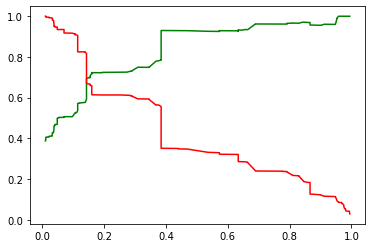

In [1699]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()